In [22]:
import pandas as pd

# Load raw CSV data
transactions = pd.read_excel("bank.xlsx")


In [23]:
transactions

,Account No,DATE,TRANSACTION DETAILS,CHQ.NO.,VALUE DATE,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT,.
0,409000611074',2017-06-29,TRF FROM Indiaforensic SERVICES,NaN,2017-06-29,NaN,1000000.0,1.000000e+06,.
1,409000611074',2017-07-05,TRF FROM Indiaforensic SERVICES,NaN,2017-07-05,NaN,1000000.0,2.000000e+06,.
2,409000611074',2017-07-18,FDRL/INTERNAL FUND TRANSFE,NaN,2017-07-18,NaN,500000.0,2.500000e+06,.
3,409000611074',2017-08-01,TRF FRM Indiaforensic SERVICES,NaN,2017-08-01,NaN,3000000.0,5.500000e+06,.
4,409000611074',2017-08-16,FDRL/INTERNAL FUND TRANSFE,NaN,2017-08-16,NaN,500000.0,6.000000e+06,.
...,...,...,...,...,...,...,...,...,...
116196,409000362497',2019-03-05,TRF TO 1196428 Indiaforensic SE,NaN,2019-03-05,117934.30,NaN,-1.901902e+09,.
116197,409000362497',2019-03-05,FDRL/INTERNAL FUND TRANSFE,NaN,2019-03-05,NaN,300000.0,-1.901602e+09,.
116198,409000362497',2019-03-05,FDRL/INTERNAL FUND TRANSFE,NaN,2019-03-05,NaN,300000.0,-1.901302e+09,.
116199,409000362497',2019-03-05,IMPS 05-03-20194C,NaN,2019-03-05,109868.65,NaN,-1.901412e+09,.


In [24]:
transactions.columns

Index(['Account No', 'DATE', 'TRANSACTION DETAILS', 'CHQ.NO.', 'VALUE DATE',
       'WITHDRAWAL AMT', 'DEPOSIT AMT', 'BALANCE AMT', '.'],
      dtype='object')

In [30]:
pd.to_datetime(transactions.DATE)

0        2017-06-29
1        2017-07-05
2        2017-07-18
3        2017-08-01
4        2017-08-16
            ...    
116196   2019-03-05
116197   2019-03-05
116198   2019-03-05
116199   2019-03-05
116200   2019-03-05
Name: DATE, Length: 116201, dtype: datetime64[ns]

In [32]:
# Convert timestamp to datetime
transactions["DATE"] = pd.to_datetime(transactions.DATE)

# Add time-based features
transactions["day_of_week"] = transactions["DATE"].dt.dayofweek
transactions["hour"] = transactions["DATE"].dt.hour

# Filter to relevant columns
filtered_columns = ["Account No", "WITHDRAWAL AMT", "TRANSACTION DETAILS", "day_of_week", "hour"]
transactions = transactions[filtered_columns]

# Handle missing values
transactions = transactions.fillna(0)

# Remove outliers
transactions = transactions[transactions["WITHDRAWAL AMT"] < 1000000]

# Export cleaned dataset
transactions.to_csv("clean_transactions.csv", index=False)

In [34]:
print(transactions["WITHDRAWAL AMT"].describe())

count     96832.000000
mean      23565.105457
std       96031.635253
min           0.000000
25%           0.000000
50%           0.000000
75%        1580.310000
max      999822.000000
Name: WITHDRAWAL AMT, dtype: float64


In [37]:
# Daily amount transferred by account type
daily_amounts = transactions.groupby(["TRANSACTION DETAILS", "day_of_week"])["WITHDRAWAL AMT"].sum().reset_index()

print(daily_amounts)

             TRANSACTION DETAILS  day_of_week  WITHDRAWAL AMT
0                              0            0             0.0
1                              0            1             0.0
2                              0            2             0.0
3                              0            3             0.0
4                              0            4             0.0
...                          ...          ...             ...
43268  ZEN LEFIN PVT LTD170123CF            0             0.0
43269  ZEN LEFIN PVT LTD170125A0            2             0.0
43270  ZEN LEFIN PVT LTD1701302E            0             0.0
43271  ZEN LEFIN PVT LTD170206BA            0             0.0
43272  ZEN LEFIN PVT LTD1702245A            4             0.0

[43273 rows x 3 columns]


/Users/vamsi/anaconda3/envs/wydo/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='hour', ylabel='Count'>

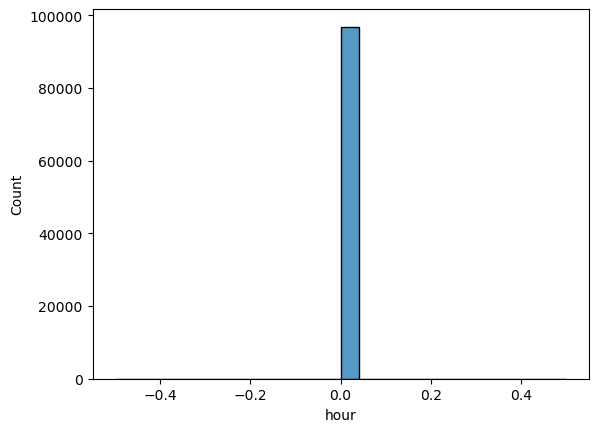

In [52]:
# Hourly transaction histogram
import seaborn as sns

sns.histplot(x="hour", data=transactions, bins=24)

In [63]:
transactions['Account No']= transactions["Account No"].str.replace("'", "").astype(int)

In [81]:
transactions.columns

Index(['Account No', 'WITHDRAWAL AMT', 'TRANSACTION DETAILS', 'day_of_week',
       'hour'],
      dtype='object')

In [83]:
transactions.groupby(['TRANSACTION DETAILS']).mean().corr()

,Account No,WITHDRAWAL AMT,day_of_week,hour
Account No,1.000000,0.101058,-0.002073,NaN
WITHDRAWAL AMT,0.101058,1.000000,-0.011448,NaN
day_of_week,-0.002073,-0.011448,1.000000,NaN
hour,NaN,NaN,NaN,NaN


/Users/vamsi/anaconda3/envs/wydo/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


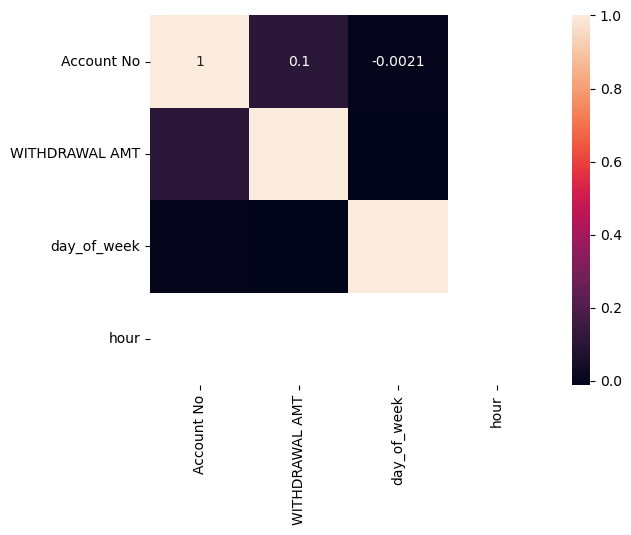

In [84]:
# Correlation matrix heatmap
import matplotlib.pyplot as plt

corr_matrix = transactions.groupby(['TRANSACTION DETAILS']).mean().corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [89]:
# Feature set
X = transactions[['Account No', 'WITHDRAWAL AMT', 
                  'day_of_week', 'hour']]

# Labels - 1 for suspected money mule, 0 for normal
y = [0, 1, 0, 1]